<a href="https://colab.research.google.com/github/PuttupuR/My-Project/blob/main/Linear_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Read the data set

In [89]:
df = pd.read_csv("/content/new_insurance_data.csv")

In [90]:
# Represent the data set
df.head(5)  # head() represents the first 5 rows

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


EDA-Descriptive Analysis on Data

In [91]:
#Describe the data - Descriptive statistics.
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [92]:
df.info() # it represents the information about entire dataset how many columns have the nonull values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [93]:
#Check if dataset have any duplicate values

df.duplicated().sum()

0

In [94]:
#Unique values in the data

print(df['age'].unique())
print(df['sex'].unique())
print(df['region'].unique())

[18. 19. nan 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 31. 30. 33. 32. 34.
 36. 37. 35. 38. 40. 39. 41. 42. 43. 44. 46. 45. 48. 47. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]
['male' 'female']
['southeast' 'southwest' 'northwest' 'northeast']


Visualize the Unique counts

AttributeError: ignored

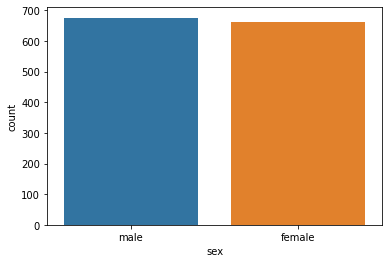

In [95]:
sns.countplot(df['sex']).unique()

In [96]:
# Label Encoding on the sex and smoker column, and changing their data  type to integer

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

#changing the data type of the two columns to integer

df['sex'] = df['sex'].astype(int)
df['smoker'] = df['smoker'].astype(int)


In [98]:
#checking the 'sex' & 'smoker' column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   int64  
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   int64  
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [99]:
df.head() # Now sex and smoker column values are in int type

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [100]:
#checking the column names in the data
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [101]:
#checking the shape of the data
df.shape

(1338, 13)

In [102]:
#summary of the insurance data
df.describe()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1338.000000,1335.000000,1333.000000,1338.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,0.505232,30.665112,1.090773,0.204783,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,0.500160,6.101690,1.201856,0.403694,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,0.000000,26.302500,0.000000,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,1.000000,34.687500,2.000000,0.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


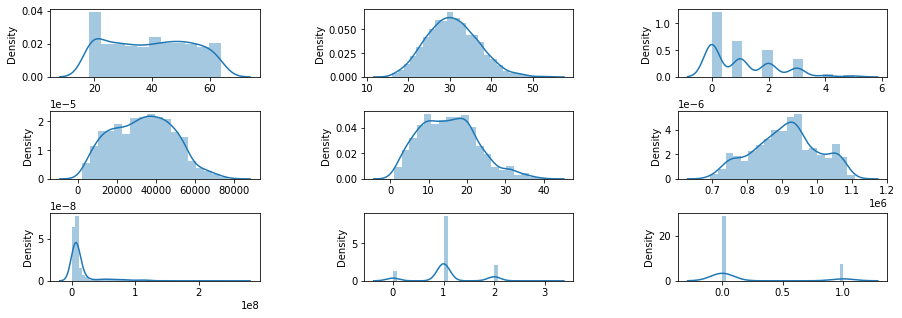

In [103]:
#checking the distribution of each data in the insurance data

fig,axes = plt.subplots(3,3, figsize=(15,5))

plt.subplot(3,3,1)
sns.distplot(x=df['age'])

plt.subplot(3,3,2)
sns.distplot(x=df['bmi'])

plt.subplot(3,3,3)
sns.distplot(x=df['children'])

plt.subplot(3,3,4)
sns.distplot(x=df['Claim_Amount'])

plt.subplot(3,3,5)
sns.distplot(x=df['past_consultations'])

plt.subplot(3,3,6)
sns.distplot(x=df['num_of_steps'])

plt.subplot(3,3,7)
sns.distplot(x=df['Hospital_expenditure'])

plt.subplot(3,3,8)
sns.distplot(x=df['NUmber_of_past_hospitalizations'])

plt.subplot(3,3,9)
sns.distplot(x=df['smoker'])

warnings.filterwarnings("ignore")
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

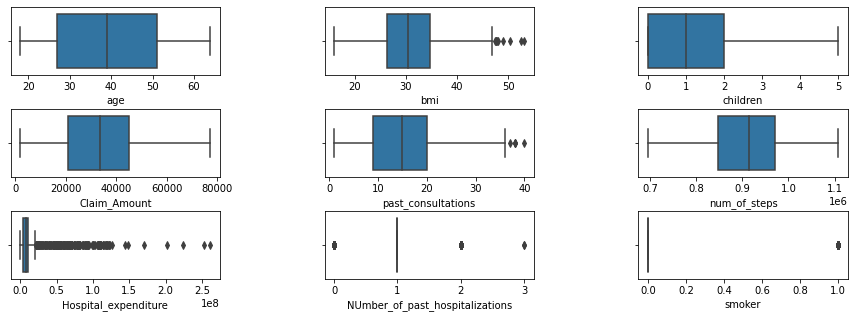

In [104]:
#To get better idea about peakdness and presence of the outliers in the data,we can make use of the boxplots

fig,axes = plt.subplots(3,3, figsize=(15,5))

plt.subplot(3,3,1)
sns.boxplot(x=df['age'])

plt.subplot(3,3,2)
sns.boxplot(x=df['bmi'])

plt.subplot(3,3,3)
sns.boxplot(x=df['children'])

plt.subplot(3,3,4)
sns.boxplot(x=df['Claim_Amount'])

plt.subplot(3,3,5)
sns.boxplot(x=df['past_consultations'])

plt.subplot(3,3,6)
sns.boxplot(x=df['num_of_steps'])

plt.subplot(3,3,7)
sns.boxplot(x=df['Hospital_expenditure'])

plt.subplot(3,3,8)
sns.boxplot(x=df['NUmber_of_past_hospitalizations'])

plt.subplot(3,3,9)
sns.boxplot(x=df['smoker'])

warnings.filterwarnings("ignore")
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

In [105]:
#Handling the null values

'''Null values in the dataset can cause ineffeciency in the model. so either we can drop the null values,or we can replace with 
 mean,median,mode of the column'''
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [106]:
#filling the null values with mean and median
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['children'] = df['children'].fillna(df['children'].median())
df['Claim_Amount'] = df['Claim_Amount'].fillna(df['Claim_Amount'].mean())
df['past_consultations'] = df['past_consultations'].fillna(df['past_consultations'].mean())
df['num_of_steps'] = df['num_of_steps'].fillna(df['num_of_steps'].mean())
df['Hospital_expenditure'] = df['Hospital_expenditure'].fillna(df['Hospital_expenditure'].median())
df['NUmber_of_past_hospitalizations'] = df['NUmber_of_past_hospitalizations'].fillna(df['NUmber_of_past_hospitalizations'].median())
df['Anual_Salary'] = df['Anual_Salary'].fillna(df['Anual_Salary'].median())

In [ ]:
#col=list(insurance.columns)
#fillna() : replace the null values to provide input
#object -->mode
#num --> mean/median
#mode-->most repeated data--->object

#numeric
 #median-->center value 
#mean
'''for col_name in col:
   if df[col_name].dtypes=='object':
     #print('ob')
     df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
   else:
     #print('num')  
     df[col_name] = df[col_name].fillna(df[col_name].mean())'''

In [107]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

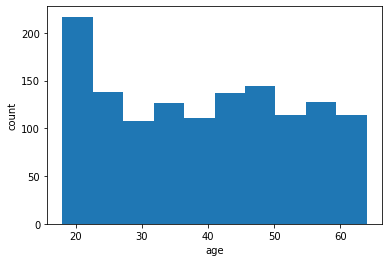

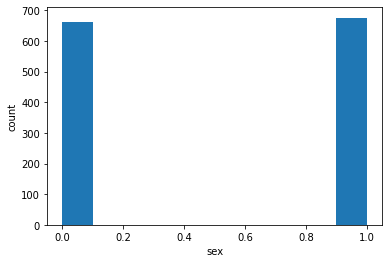

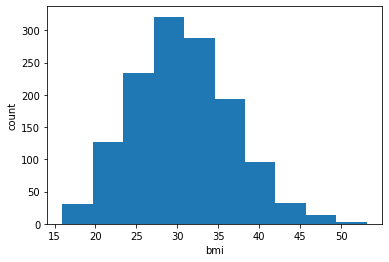

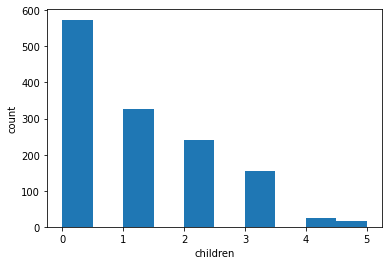

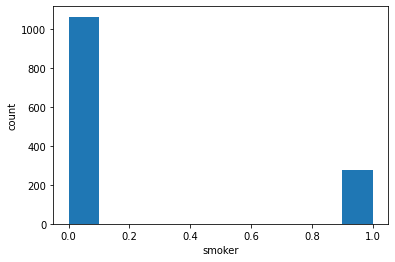

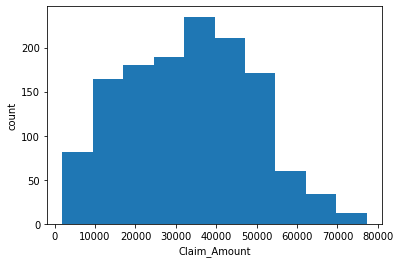

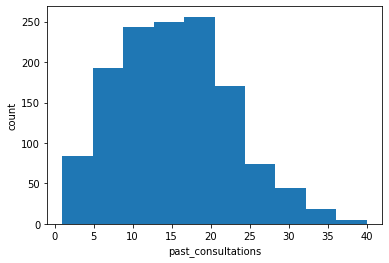

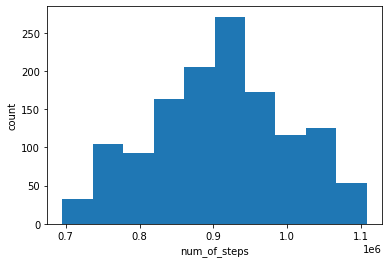

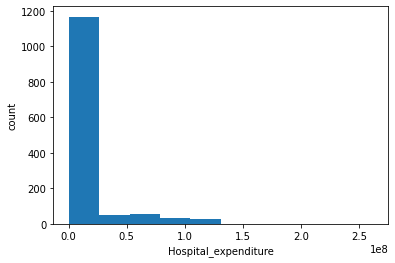

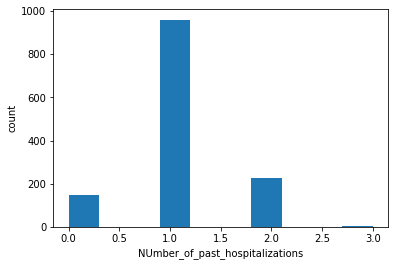

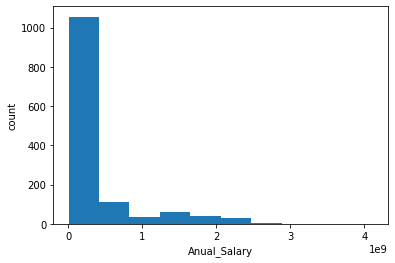

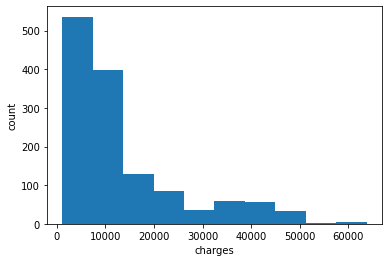

In [108]:
#Distribution of Numerical data
col=list(df.columns)
for col_name in col:
  if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
    plt.hist(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

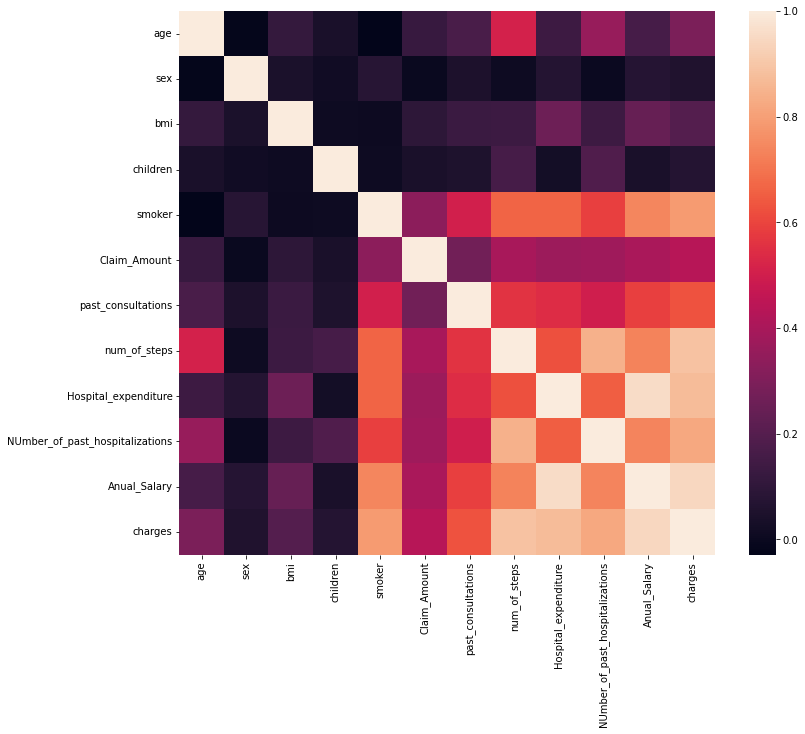

In [124]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor)
plt.show()

In [ ]:
'''The columns that show good correlation with the target variable are gng to be used for the prediction '''

In [110]:
#Splitting the data into Train and Test

from sklearn.model_selection import train_test_split

#splitting the data
x = df.drop(['charges','age','sex','bmi','children','region'],axis=1)
y = df.iloc[:,-1]

#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train

,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
560,0,29622.26103,6.0,886052.0,7.579867e+06,1.0,1.589946e+08
1285,1,66824.70947,23.0,1063413.0,8.042196e+07,2.0,1.919607e+09
1142,0,36320.75384,16.0,1001618.0,1.772151e+07,2.0,7.139574e+08
969,0,24827.43078,8.0,962113.0,1.214312e+07,1.0,2.928227e+08
486,0,47348.03370,10.0,888358.0,6.034962e+06,1.0,5.093163e+07
...,...,...,...,...,...,...,...
1095,0,47554.34106,19.0,1007896.0,1.132722e+07,1.0,5.662888e+08
1130,0,63672.07916,14.0,1000863.0,2.295519e+07,2.0,6.472972e+08
1294,1,42578.49702,24.0,1061168.0,9.188836e+07,2.0,2.038383e+09
860,0,27369.02461,22.0,943007.0,3.634140e+06,1.0,1.877743e+08


**Feature Scaling**

In [111]:
#Feature scaling using standardscalar

from sklearn.preprocessing import StandardScaler
#scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[-0.50874702, -0.24550745, -1.2335211 , ..., -0.29745518,
        -0.10122056, -0.36540273],
       [ 1.96561348,  2.14294016,  1.08058381, ...,  2.44746197,
         1.76612428,  2.78222091],
       [-0.50874702,  0.18454486,  0.12771708, ...,  0.08471359,
         1.76612428,  0.62675985],
       ...,
       [ 1.96561348,  0.58630046,  1.21670762, ...,  2.87955205,
         1.76612428,  2.99456786],
       [-0.50874702, -0.39016829,  0.94445999, ..., -0.44614248,
        -0.10122056, -0.31395035],
       [-0.50874702,  0.25290014,  1.48895526, ...,  0.01197612,
         1.76612428,  0.57733069]])

**Linear Regression Model**

In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
#fitting the model
model.fit(x_train,y_train)


LinearRegression()

In [113]:
#making Predictions

predictions = model.predict(x_test)

**Model Evaluation**

In [114]:
from sklearn.metrics import r2_score
#r2_score
r2 = r2_score(y_test,predictions)
print("r2 score is: {}".format(r2))

#adjusted r2 score
adj_r2 = 1 - (1 - r2)*len(y_train)/(len(y_train)-x_train.shape[1]-1)
print("adjusted r2 score is: {}".format(adj_r2))


r2 score is: 0.9710072494452009
adjusted r2 score is: 0.9707888483110781


In [116]:
#Mean squared error

from sklearn.metrics import *
#mean squred error
rmse_on_test = mean_squared_error(y_test,predictions,squared=False)
print("mean squred error on test data is: {}".format(rmse_on_test))

mean squred error on test data is: 2152.8961180440347


In [117]:
train_predict = model.predict(x_train)

In [118]:
rmse_on_train = mean_squared_error(y_train,train_predict,squared=False)
print("mean squred error on train data is: {}".format(rmse_on_train))

mean squred error on train data is: 1526.9983846830644


In [119]:
#Mean absolute percentage error
mape_on_train = mean_absolute_percentage_error(y_train, train_predict)
print("mean absolute percentage error on train data is: {}".format(mape_on_train))


mean absolute percentage error on train data is: 0.1845062145631791


In [120]:
mape_on_test = mean_absolute_percentage_error(y_test, predictions)
print("mean absolute percentage error on test data is: {}".format(mape_on_test))

mean absolute percentage error on test data is: 0.14947107277533142


**Plotting the best fit line**

In [121]:
error_pred = pd.DataFrame(columns={'Actual_data','Predicted_data'})

error_pred['Actual_data'] = y_test
error_pred['Predicted_data'] = predictions
error_pred['Error'] = error_pred['Actual_data']-error_pred['Predicted_data']

In [122]:
error_pred.head()

,Predicted_data,Actual_data,Error
764,10732.075670,10928.84900,196.773330
887,11370.964876,12648.70340,1277.738524
890,11967.708103,12797.20962,829.501517
1293,43364.988159,44202.65360,837.665441
259,4472.219237,3925.75820,-546.461037


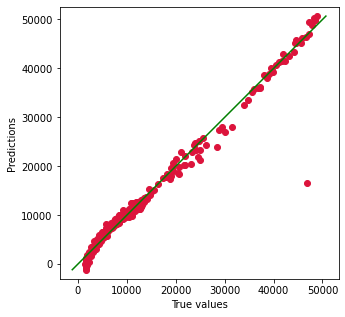

In [123]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred['Actual_data'],error_pred['Predicted_data'],c='crimson')

p1 = max (max(error_pred['Predicted_data']),max(error_pred['Actual_data']))
p2 = min (min(error_pred['Predicted_data']),min(error_pred['Actual_data']))

plt.plot([p1,p2],[p1,p2],'-g')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()